# Retke matrice

Podsetimo se da su retke matrice (engl. sparse matrix) matrice u kojima je *veliki broj* elementa jednak nuli. 
![retke matrice](assets/sparse_matrix.png)
Zahvaljujući ovoj svojoj osobini za njihovo čuvanje je potrebno manje memorije, a operacije nad njima se mogu izvoditi efikasnije. Ova sveska sumira osnovne formate retkih matrica i neke principe rada sa njima.

Matrice koje nisu retke zovemo gustim matricama (engl. dense matrix).

In [1]:
import numpy as np
np.random.seed(7)

Rad sa retkim matricama podržan je paketom `sparse` biblioteke `scipy`.

In [2]:
from scipy import sparse

Osnovni formati za zapis retkih matrica su: `CSC` (Compressed Sparse Column), `CSR` (Compressed Sparse Row), `COO` (COOrdinate format), `DOK` (Dictionary of Keys), `DIA` (DIAgonal format), `LiL` (List of Lists) i `BSR` (List of Lists). Nadalje ćemo upoznati neke najčešće korišćene.

U `COO` formatu matrice se čuvaju kao trojke indeksa vrsta, indeksa kolona i vrednosti elementa različitih od nule. <img src='assets/coo_format.gif' style='width:600px'>

In [3]:
row = [1, 3, 0, 2, 4]
column = [1, 4, 2, 3, 3]
data = [2, 5, 9, 1, 6]
coo = sparse.coo_matrix((data, (row, column)), shape=(6, 7))

In [4]:
print(coo)

  (1, 1)	2
  (3, 4)	5
  (0, 2)	9
  (2, 3)	1
  (4, 3)	6


In [5]:
coo.toarray()

array([[0, 0, 9, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 5, 0, 0],
       [0, 0, 0, 6, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

U `CSR` formatu čuvaju se indeksi vrsta, indeksi kolona i vrednosti elemenata različitih od nule ali sa idejom da se dodatno optimizuju operacije nad njima. Za svaka dva susedna elementa u indeksu vrsta prvi broj označava indeks vrste u kojoj se nalaze ne-nula elementi, a drugi je izračunat tako da njihova razlika predstavlja broj ne-nula elemenata u vrsti. U indeksu kolona popisane su za svaku vrstu uzastopno indeksi kolona u kojima se nalaze ne-nula elementi. Niz sa vrednostima elemenata sadrži same elemente. Sledeća animacija približava ovaj (možda malo konfuzan) opis. <img src='assets/csr_format.gif' style='width:600px'>

Ovakve matrice konstruišu se pozivom funkcije `csr_matrix` nad argumentima koji, redom, predstavljaju ne-nula elemenate matrice, indekse njihovih kolona i indekse njihovih vrsta u prethodno opisanom formatu. Alternativni način kreiranja je korišćenjem trojki koje sadrže vrednosti i parove njihovih indeksa. 

In [6]:
index_pointers = np.array([0, 2, 3, 3, 3, 6, 6, 7])
indices = np.array([0, 2, 2, 2, 3, 4, 3])
data = np.array([8, 2, 5, 7, 1, 2, 9])

csr = sparse.csr_matrix((data, indices, index_pointers))

In [7]:
print(csr)

  (0, 0)	8
  (0, 2)	2
  (1, 2)	5
  (4, 2)	7
  (4, 3)	1
  (4, 4)	2
  (6, 3)	9


In [8]:
csr.toarray()

array([[8, 0, 2, 0, 0],
       [0, 0, 5, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 7, 1, 2],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 9, 0]])

`CSC` format predstavlja ekvivalent prethodnog formata ali sa specifično zapisanim indeksom kolona. <img src='assets/csc_format.gif' style='width:600px'>

Ovakve matrice konstruišu se pozivom funkcije `csc_matrix` na argumentima koji, redom, predstavljaju ne-nula elemenate matrice, indekse njihovih vrsta i indekse njihovih kolona.

In [9]:
index_pointers = np.array([0, 1, 1, 4, 6, 7])
indices = np.array([0, 0, 1, 4, 4, 6, 4]) 
data = np.array([8, 2, 5, 7, 1, 9, 2])                       

In [10]:
csc = sparse.csc_matrix((data, indices, index_pointers))

In [11]:
print(csc)

  (0, 0)	8
  (0, 2)	2
  (1, 2)	5
  (4, 2)	7
  (4, 3)	1
  (6, 3)	9
  (4, 4)	2


In [12]:
csc.toarray()

array([[8, 0, 2, 0, 0],
       [0, 0, 5, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 7, 1, 2],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 9, 0]])

Biblioteka podržava konverzije iz jednog formata zapisa u drugi format. 

In [13]:
sparse.csc_matrix(coo).toarray()

array([[0, 0, 9, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 5, 0, 0],
       [0, 0, 0, 6, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=int64)

Kao što smo videli u primerima, gusta reprezentacija retkih matrica se može dobiti pozivima `toarray` ili `todense` metoda. Prva metoda vraća matricu koja je tipa `ndarray`, a druga matricu koja je tipa `matrix`. Tip `matrix` se razlikuje od `ndarray` niza po specifičnostima nekih operacija, na primer A\*B predstavlja matrično, a ne pokoordinatno množenje. Preporučuje se korišćenje `toarray` metode.

Ukoliko je od postojeće guste matrice potrebno kreirati retku matricu, mogu se iskoristiti funkcije `coo_matrix`, `csr_matrix` i `csc_matrix` i njima slične.

In [14]:
array = np.array([
    [ 1,  0, 13,  0,  0],
    [ 0,  2,  0, 14,  0],
    [ 0,  0,  3,  0, 15],
    [ 6,  0,  0,  4,  0],
    [ 0,  7,  0,  0,  5],
    [ 0,  0,  8,  0,  0],
    [ 0,  0,  0,  9,  0]])

In [15]:
sparse_array = sparse.csc_matrix(array)

Proizvoljne retke matrice se mogu generisati pozivom funkcije `random` koja očekuje informacije o dimenziji matrice i broju ne-nula elementa. Alternativno, može se koristiti i funkcija `rand` koja bira vrednosti iz uniformne raspodele. Podrazumevani format matrica je COO.

In [16]:
sparse.random(m=7, n=5, density=0.5).toarray()

array([[0.4465059 , 0.        , 0.        , 0.38464957, 0.        ],
       [0.79076351, 0.        , 0.35747524, 0.95124834, 0.        ],
       [0.85129459, 0.93762934, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.34875638, 0.        , 0.61370347],
       [0.        , 0.27651471, 0.17405276, 0.        , 0.4826369 ],
       [0.10047397, 0.95791373, 0.        , 0.        , 0.        ],
       [0.        , 0.4488258 , 0.17957689, 0.19335562, 0.        ]])

Broj ne-nula (engl. non-zero) elemenata se može dobiti svojstvom `nnz`, a sami indeksi elemenata pozivom funkcije `nonzero`.

In [17]:
sparse_array.nnz

12

In [18]:
sparse_array.nonzero()

(array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 6], dtype=int32),
 array([0, 2, 1, 3, 2, 4, 0, 3, 1, 4, 2, 3], dtype=int32))

Za vizuelizaciju retkih matrica može se iskoristiti funkcija `spy` biblioteke `matplotlib`. Ova funkcija prikazuje samo vrednosti različite od nule na odgovarajućoj 2D mreži čije dimenzije odgovaraju dimenziji matrice pa se uz brojčane vrednosti može steći utisak o strukturi matrice. 

In [19]:
from matplotlib import pyplot as plt

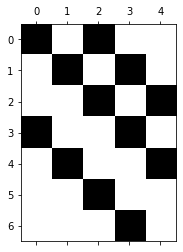

In [20]:
plt.spy(array)
plt.show()

Uporedimo razlike u veličinama gustih i retkih matrica. Skup podataka sa kojim ćemo eksperimentisati će biti uzorkovan iz binomne raspodele sa verovatnoćom uspeha 0.1 i biće dimenzija 2000x10000.  

In [21]:
dense_dataset = np.random.binomial(1, 0.1, 20000000).reshape(2000,10000)  
sparse_dataset = sparse.csr_matrix(dense_dataset)

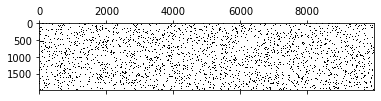

In [22]:
plt.spy(dense_dataset)

Memorijska veličina nizova se može dobiti svojstvom `nbytes`. Mi ćemo je računati izraženu u megabajtima. 

In [23]:
dense_dataset_size = np.array(dense_dataset).nbytes/1e6
sparse_dataset_size = (sparse_dataset.data.nbytes + sparse_dataset.indptr.nbytes + sparse_dataset.indices.nbytes)/1e6

<BarContainer object of 2 artists>

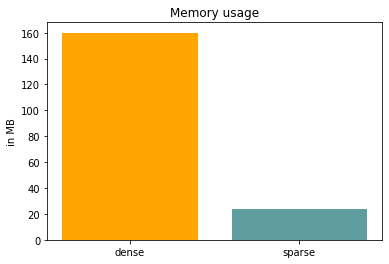

In [24]:
plt.ylabel('in MB')
plt.title('Memory usage')
plt.bar(['dense', 'sparse'], [dense_dataset_size, sparse_dataset_size], color=['orange', 'cadetblue'])

Pojedinačnim elementima retkih matrica se ne može pristupiti na uobičajen način. Mogu se pročitati vrste ili kolone, ali će i one biti retki nizovi (matrice) sami po sebi. 

In [25]:
sparse_matrix = sparse.random(m=5, n=5, density=0.4)

In [26]:
sparse_matrix.getrow(1)

<1x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [27]:
sparse_matrix.getcol(1)

<5x1 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

Na nivou `linalg` paketa biblioteke `scipy` su podržane algebarske funkcije za rad nad ovakvim tipom matrica. 

In [28]:
from scipy.sparse import linalg

In [29]:
linalg.eigs(sparse_matrix, k=2)

(array([ 0.98305491+0.j        , -0.36676998-0.22944842j]),
 array([[ 1.81634397e-16+0.00000000e+00j,  1.53709032e-16+1.55334081e-16j],
        [ 5.53800991e-19+0.00000000e+00j,  2.51257450e-19+3.58601574e-19j],
        [ 3.52505283e-01+0.00000000e+00j,  9.63873611e-02-5.70046255e-01j],
        [ 6.92653953e-01+0.00000000e+00j,  5.37345133e-01+4.13197318e-01j],
        [ 6.29261890e-01+0.00000000e+00j, -3.01705808e-01+3.39497474e-01j]]))

In [30]:
linalg.norm(sparse_matrix)

1.6687937339788674